# Exercise 1

The main algorithm I will be using is the Metropolis algorithm. This is kind of Monte Carlo technique that is used very often for the Ising model, and a simliar implementation is used in the Pott's model. The way it works is we choose a set of probablilities for it to choose for each possible transition from one phase to another. After this we also set some acceptance probablities so that the algorithm may choose what spins to flip in a given lattice. 

For the Pott's model it shares a lot od similarities to that of the Ising model. You would implement it in the same way but we now also have the Kronecker delta function which when the states i=j it will return 1 and zero otherwise depending on what the neighbors contribute by some fractional value of the coupling constant J. However when we choose a high q-state value this algorithm starts to break down. For example if T>0 and q=100 and our one spin is one of the 96 that is contributing to a changing spin state then it will take 25 steps to find the other states which is not resonable in terms of time efficiency. One way to get around this would be to implement the heat-bath algorithm, but that is very advanced and I will not be doing that here for this project.

To implement this for the Pott's model we need to do the following:
- Set the q-state to be observed
- Set the initial spin of the system
- Give the system an initial energy
- Define the Kronecker delta function that determines whether spins equal each other
- Set up a function for the magnetization across spins
- Calculate and sum the energy differences for the neighbors on the top, bottom, right, and left
- Update acceptance values based on a Boltzmaan distribution probability and run simulation

Source: "Numerical Recipies" by M. E. J. Newman and G. T. Barkema

# Exercise 2

In [1]:
#Kaleb Kautzsch
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import hbar, m_e, e
from scipy.integrate import simps
from numpy import sqrt, square

V0 = 50*e
a = 1e-11
X = 5 

L = 5.2917721e-11     

Y =[]


numSteps = 500
stepSize = 2*X*a/numSteps


def V(x):
    return V0*x**4/a**4


def f(r,x,E):
    psi = r[0]
    phi = r[1]    
    fpsi = phi   
    fphi = (2*m_e/hbar**2)*(V(x)-E)*psi
    return np.array([fpsi,fphi],float)


def solve(E):
    global Y
    psi = 0.0
    phi = 1.0    
    r = np.array([psi,phi],float)
    Y=[]

    for x in np.arange(-X*a,X*a,stepSize):
        Y.append(r[0])
        k1 = stepSize*f(r,x,E)
        k2 = stepSize*f(r+0.5*k1,x+0.5*stepSize,E)
        k3 = stepSize*f(r+0.5*k2,x+0.5*stepSize,E)
        k4 = stepSize*f(r+k3,x+stepSize,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]


E11 = 0.0
E12 = e
# 1st excited
E21 = e
E22 = 700*e
# 2nd excited
E31 = 700*e
E32 = 1400*e

psi2 = solve(E11)
psi3 = solve(E21)
psi4 = solve(E31)

target = e/1000
while abs(E11-E12)>target:
    psi1, psi2 = psi2, solve(E12)
    E11, E12 = E12, E12-psi2*(E12-E11)/(psi2-psi1)

# Eground = E2

print("E ground =",E12/e,"eV")

wfGround=Y

E ground = 205.30182762352732 eV


In [2]:
while abs(E21-E22)>target:
    psi1, psi3 = psi3, solve(E22)
    E21, E22 = E22, E22-psi3*(E22-E21)/(psi3-psi1)
    
# Efirst = E3    

print("E 1st excited=",E22/e,"eV")
wf1=Y

E 1st excited= 735.6730591781931 eV


In [3]:
while abs(E31-E32)>target:
    psi1, psi4 = psi4, solve(E32)
    E31, E32 = E32, E32-psi4*(E32-E31)/(psi4-psi1)

# Ethird = E4
    
print("E 2nd excited=",E32/e,"eV")
wf2=Y

E 2nd excited= 1443.533733115482 eV


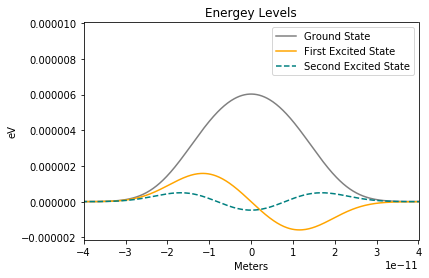

In [4]:
x1 = np.arange(-X*a,X*a,stepSize)

plt.plot(x1,wfGround, label='Ground State',color='grey')
plt.plot(x1,wf1, label='First Excited State',color='orange')
plt.plot(x1,wf2,'--', label='Second Excited State',color='teal')

plt.xlim(-4e-11,4e-11)
plt.title('Energey Levels')
plt.xlabel('Meters')
plt.ylabel('eV')
plt.legend()
plt.show()

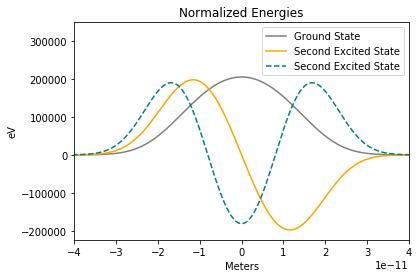

In [5]:
int1 = simps(square(wfGround),x1)
int2 = simps(square(wf1),x1)
int3 = simps(square(wf2),x1)

norm1 = wfGround/sqrt(int1)
norm2 = wf1/sqrt(int2)
norm3 = wf2/sqrt(int3)

plt.plot(x1,norm1, label='Ground State', color='grey')
plt.plot(x1,norm2, label='Second Excited State', color='orange')
plt.plot(x1,norm3, '--', label='Second Excited State', color='teal')
plt.xlim(-4e-11,4e-11)
plt.xlabel('Meters')
plt.ylabel('eV')
plt.title('Normalized Energies')
plt.legend()

# Exercise 3

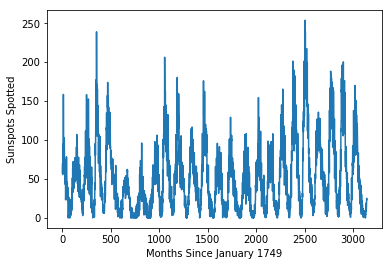

In [6]:
#Part (i)
from scipy.fftpack import fft, fftfreq
from scipy.fftpack import fftshift, ifftshift

data = np.loadtxt('sunspots.txt',float)
y = data[:,1]
plt.plot(y[0:3142])
plt.xlabel('Months Since January 1749')
plt.ylabel('Sunspots Spotted')
plt.show()

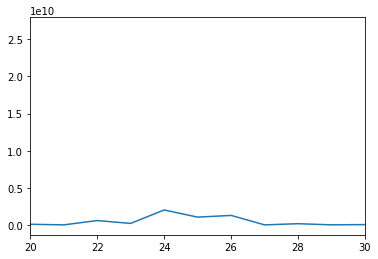

In [7]:
#Part (ii)
c = fft(data[:,1])
plt.plot(abs(c)**2)
plt.xlim(20,30)
plt.show()

In [12]:
#Part (iii)
k = 24
frequency = (k)/len(y[:])
period = 1/frequency
print("Period is approximatly:",period," months",'or',period/12,'years')

Period is approximatly: 130.95833333333331  months or 10.913194444444443 years


# Exercise 4

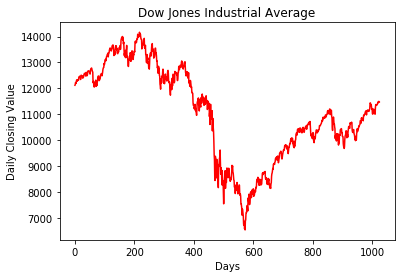

In [9]:
#Part (i)
dow = np.loadtxt("dow.txt",float)

plt.plot(dow,color='red')
plt.title('Dow Jones Industrial Average')
plt.xlabel('Days')
plt.ylabel('Daily Closing Value')
plt.show()

C:\Users\Dino the Dino\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


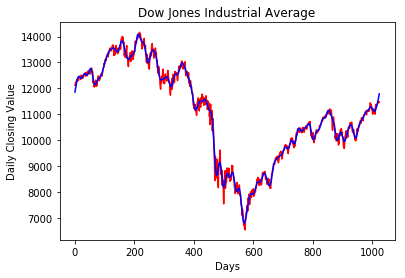

In [10]:
#Part (ii)
from scipy.fftpack import fft, ifft, fftshift, ifftshift

c = fft(dow)
cMod = c
cMod[52:972] = 0
dowMod = ifft(cMod)

plt.plot(dow,color='red')
plt.plot(dowMod,color='blue')
plt.title('Dow Jones Industrial Average')
plt.xlabel('Days')
plt.ylabel('Daily Closing Value')
plt.show()

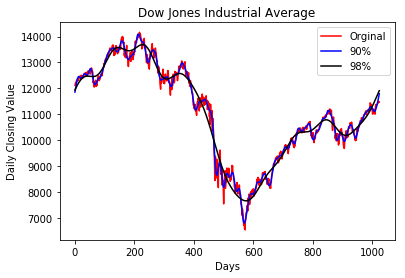

The degree of smoothing can be influenced by removing the number of secondary peaks i.e the more peaks removed, the smoother the function.


In [11]:
#Part (iii)
c = fft(dow)
cMod1 = c
cMod1[10:1014] = 0
dowMod1 = ifft(cMod1)

plt.plot(dow,color='red',label='Orginal')
plt.plot(dowMod,color='blue',label='90%')
plt.plot(dowMod1,color='black',label='98%')
plt.title('Dow Jones Industrial Average')
plt.xlabel('Days')
plt.ylabel('Daily Closing Value')
plt.legend()
plt.show()

print("The degree of smoothing can be influenced by removing the number of secondary peaks i.e"\
      " the more peaks removed, the smoother the function.")